In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd

Relevant functions found in: **Add to another file**

In [3]:
def annotate_scatter_points(points,fig,ax):
    """
    Annotate scatter plot points with point numbers.

    Parameters:
    - points: List of (x, y) coordinates for scatter plot.

    Example:
    annotate_scatter_points([[0, 0], [1, 1], [2, 3], [2, 5]])
    """

    for i, (x, y) in enumerate(points, 1):
        ax.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(5,5), ha='center')

# Example usage 'annotate_scatter_points([[0, 0], [1, 1], [2, 3], [2, 5]],fig,axeee)''

In [4]:
def extract_substances(dataframe):
    # Get the column names from the DataFrame
    columns = dataframe.columns

    # Create a dictionary to store the count of each unique substance
    substance_counts = {}

    # Extract unique substances from the column names and count occurrences
    for column in columns:
        # Split the column name based on the numeric part
        substance = ''.join([i for i in column if not i.isdigit()])
        
        # Update the count in the dictionary
        substance_counts[substance] = substance_counts.get(substance, 0) + 1

    # Convert the dictionary to two lists (substances and counts) and sort them
    unique_substances_list = sorted(list(substance_counts.keys()))
    counts_list = [substance_counts[substance] for substance in unique_substances_list]

    return unique_substances_list,counts_list

In [5]:
def get_fp_data(fpc_object,pcs = 2,gridpoints = np.arange(360)):
    """
    'Inputs'
    fpc_obj - functional data object already in pca form (1-D)
    pcs - number of functional principal components to take into account (int)
    
    'Outputs'
    np.arr - X array (gridpoints)
    np.arr 2D - Y arrays (data points - no. fpcs - 2 by default)
    """
    fpc_grid_points = fpc_object.components_.to_grid(gridpoints).grid_points[0]
    fpc_data_points = [np.zeros_like(fpc_grid_points) for i in range(pcs)]
    fpc_variance_exp = np.array([fpc_object.explained_variance_ratio_[i] for i in range(pcs)])
    for i in range(pcs):
        fpc_data_points[i] = fpc_object.components_.to_grid(gridpoints)[i].data_matrix[0].flatten()
        
    return fpc_grid_points,fpc_data_points,fpc_variance_exp

In [6]:
#define parameters
specie = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
specie_dim = {'E':'X','G':'Y','R':'Z'}

In [7]:
#locate files and load data for each species
directory = r'D:\VP\ARTICLE2\ArticleData'
mean = True #if IGT should be false
data = {s:pd.read_csv(r'{}\{}_{}_m_data.csv'.format(directory,s,specie_dim[s])) for s in specie}

In [8]:
data['E'].head()

,Copper0,Copper1,Copper2,Copper3,Copper4,Copper5,Copper6,Copper7,Methomyl0,Methomyl1,...,Methomyl4,Methomyl5,Methomyl6,Verapamil0,Verapamil1,Verapamil2,Zinc0,Zinc1,Zinc2,Zinc3
0,0.945344,1.178407,0.942724,0.579559,0.914621,0.961204,0.745719,1.050060,0.467611,0.380521,...,0.539370,0.904664,0.361904,0.640712,0.631497,0.773536,0.635086,0.512021,0.862880,0.904256
1,0.938500,1.221824,0.944277,0.584017,0.911131,0.951598,0.748828,1.051829,0.461963,0.378061,...,0.538812,0.900993,0.370543,0.629859,0.627467,0.782709,0.639892,0.516113,0.862510,0.894739
2,0.932024,1.248514,0.942291,0.592446,0.910729,0.945301,0.751730,1.050432,0.452700,0.375472,...,0.538224,0.894976,0.383075,0.617883,0.622113,0.792597,0.642081,0.520889,0.861477,0.884955
3,0.919930,1.247853,0.939164,0.603059,0.913264,0.946802,0.755181,1.051703,0.445602,0.372888,...,0.537319,0.893944,0.398040,0.608372,0.620058,0.797667,0.645558,0.523997,0.862174,0.874373
4,0.913487,1.223459,0.936387,0.621582,0.917755,0.943569,0.765421,1.054773,0.439288,0.370307,...,0.536095,0.893248,0.409270,0.598150,0.618374,0.802557,0.646876,0.525455,0.864088,0.866415


In [9]:
#identify all used substances
substances,counts = extract_substances(data[[*data][0]])
for i in range(4): print('{}: {} repetitions'.format(substances[i],counts[i]))

Copper: 8 repetitions
Methomyl: 7 repetitions
Verapamil: 3 repetitions
Zinc: 4 repetitions


In [10]:
#colours inspired from plotly
plot_colors = {'Copper':'#8c564b','Methomyl':'#9467bd','Verapamil':'#d62728','Zinc':'#e377c2'}
fpc_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
custom_palette = [plot_colors[s] for s in plot_colors]
sns.set_palette(custom_palette)
custom_palette

['#8c564b', '#9467bd', '#d62728', '#e377c2']

In [11]:
#Define columns and y values for functional data analysis
cols = data[[*data][0]].columns
y = ['{}'.format(s) for i,s in enumerate(substances) for x in range(counts[i])]
y

['Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Verapamil',
 'Verapamil',
 'Verapamil',
 'Zinc',
 'Zinc',
 'Zinc',
 'Zinc']

In [84]:
#custom legend handles
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color=plot_colors[sub], label=sub) for sub in substances]

Text(0, 0.5, 'Normalised mean amplitude')

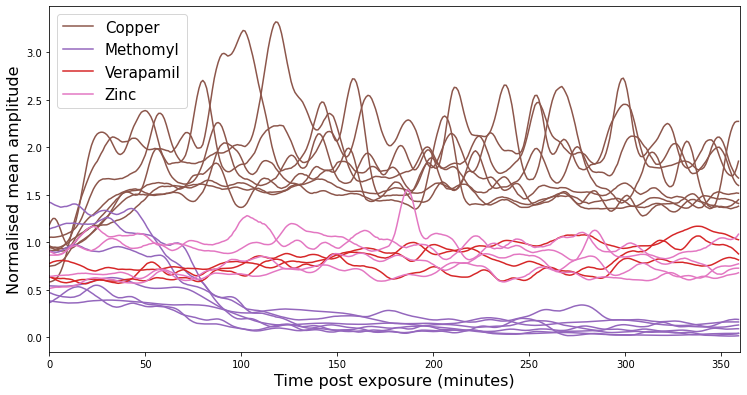

In [85]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'E'
for x,col in enumerate(data[sp].columns):
    axe.plot(data[sp].index,data[sp][col].values,color = plot_colors[y[x]])
    
axe.legend(handles = legend_handles,fontsize = 15)
axe.set_xlim([0,360])

axe.set_xlabel('Time post exposure (minutes)',fontsize = 16)
axe.set_ylabel('Normalised mean amplitude',fontsize = 16)

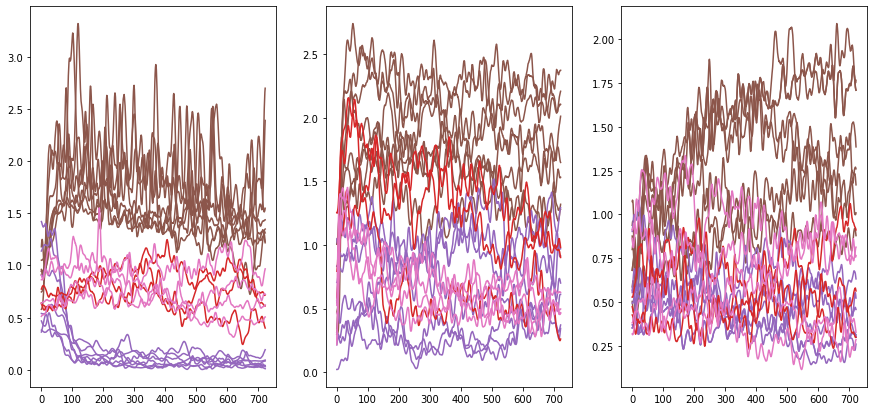

In [14]:
fig,axes = plt.subplots(1,3,figsize=(15,7))
for i,s in enumerate(specie):
    for x,col in enumerate(data[s].columns):
        axes[i].plot(data[s].index,data[s][col].values,color = plot_colors[y[x]])

Functional BSpline approx

In [15]:
from skfda.representation.grid import FDataGrid
from skfda.representation.basis import BSplineBasis

In [16]:
#Define timestep for data and extract first 2 hours (60 * 2 * 3) - timesteps 20s
timestep = 30
full_length = data[[*data][0]].shape[0]
#n_rows = (full_length//timestep)*timestep
n_rows = 360
#Cut dataframe at n_rows
for s in specie:
    data[s] = data[s].iloc[:n_rows]
    
data[s].shape

(360, 22)

Explain

In [37]:
#define FDA parameters with uneven knots
domain_range = (0,n_rows)
order = 4

#define knots with uneven spacing
knots = np.hstack((np.array([0,30,60,90]),np.arange(180,n_rows+90,90)))
#knots = np.hstack((np.array([0,30,60,90,120,150]),np.arange(180,181)))

n_basis = len(knots) + order - 2

bbs = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)
print('FDA knots')
knots

FDA knots


array([  0,  30,  60,  90, 180, 270, 360])

In [38]:
#define grid points and data matrices
grid_points = np.arange(n_rows)
data_matrices = {s:np.transpose(np.array(data[s].iloc[:n_rows])) for s in specie}

#define functional data grids
fds = {s:FDataGrid(data_matrix=data_matrices[s],grid_points=grid_points,) for s in specie}

Create basis functions

In [39]:
#create basis functions
bss = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)

In [40]:
#basis dictionary per species
X_bss = {s:fds[s].to_basis(bss) for s in specie}

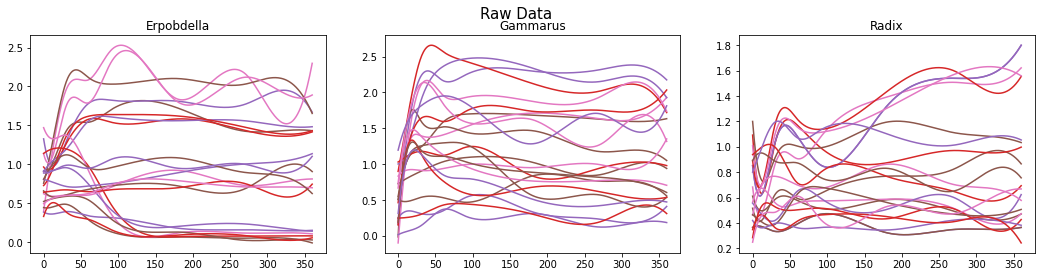

In [41]:
#plot b spline functinos
#sort colors error
fig,axe = plt.subplots(1,3,figsize = (18,4))
fig.suptitle('Raw Data',fontsize = 15)
for i,s in enumerate(specie): 
    X_bss[s].plot(axes = axe[i])
    axe[i].set_title(specie[s])

Convert BSpline functional data back to array of smoothed points

In [42]:
#bspline approximations as array
X_grid = {s:X_bss[s].to_grid(grid_points = np.arange(n_rows)) for s in specie}

(0.0, 360.0)

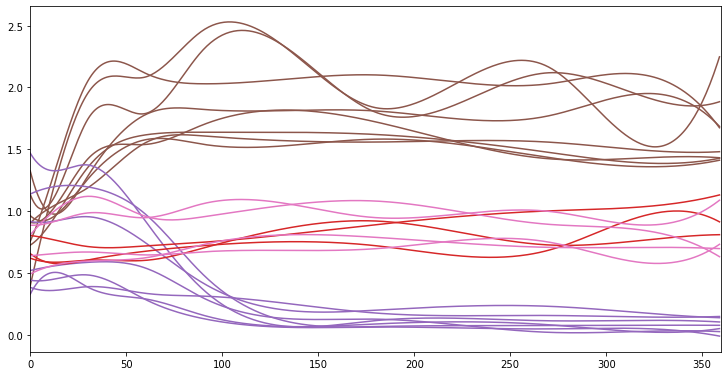

In [43]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'E'
for x,col in enumerate(data[sp].columns):
    axe.plot(X_grid[sp].grid_points[0],X_grid[sp].data_matrix[x].flatten(),color = plot_colors[y[x]])
axe.set_xlim([0,360])

In [64]:
X_grid[sp].data_matrix[:,0].min()

0.32951957843698215

Text(0, 0.5, 'Normalised mean amplitude')

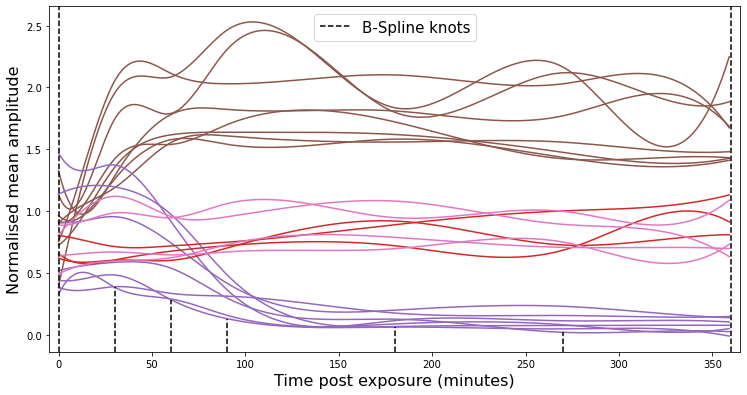

In [81]:
#Same plot but with knots visible
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
for x,col in enumerate(data[sp].columns):
    axe.plot(X_grid[sp].grid_points[0],X_grid[sp].data_matrix[x].flatten(),color = plot_colors[y[x]])
    
y_min, y_max = axe.get_ylim()
for knot in knots[1:-1]: 
    knot_min = X_grid[sp].data_matrix[:,knot].min()
    ymax = (knot_min - y_min) / (y_max - y_min)
    axe.axvline(knot,ymax = ymax,color = 'black',linestyle = '--')
axe.axvline(0,color = 'black',linestyle = '--')
axe.axvline(360,color = 'black',linestyle = '--')
axe.set_xlim([-5,365])

legend_handles = [
    Line2D([0], [0], color='#000000', label='B-Spline knots',linestyle = '--')
]
plt.legend(handles=legend_handles,fontsize = 15)

axe.set_xlabel('Time post exposure (minutes)',fontsize = 16)
axe.set_ylabel('Normalised mean amplitude',fontsize = 16)

# FPCA

In [87]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA

In [88]:
fpcas = {s: FPCA(n_components=2).fit(X_bss[s]) for s in specie}

In [89]:
#FDA components
fpcas['E'].components_

FDataBasis(
    basis=BSplineBasis(domain_range=((0.0, 360.0),), n_basis=9, order=4, knots=(0, 30, 60, 90, 180, 270, 360)),
    coefficients=[[ 0.00617687  0.00721358  0.03901068  0.04079261  0.07120956  0.04771143
       0.06363113  0.04965073  0.05425285]
     [ 0.06923397  0.08439023  0.15974538  0.08706543 -0.00612189 -0.04429262
       0.01150064 -0.05359012 -0.03040647]],
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None)

### Plot for FPCA components

*Easily adapted for any species*

Text(0.5, 1.0, 'Functional Principal Component plot')

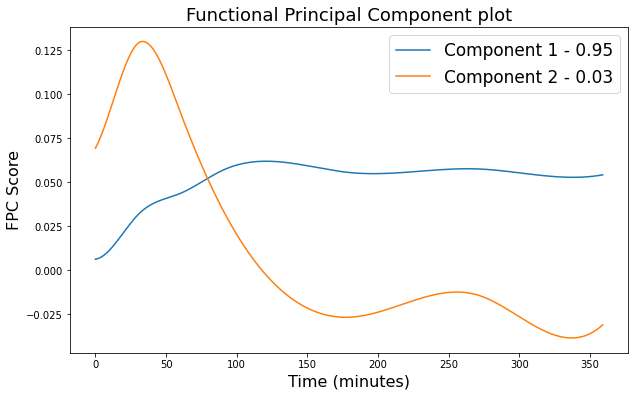

In [90]:
#Convert fpc1 and fpc2 to np.arrays
grid_points,data_points,variances = get_fp_data(fpcas['E'],gridpoints = np.arange(n_rows))

#plot each component
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(grid_points,data_points[0],color = fpc_colors[0])
ax.plot(grid_points,data_points[1],color = fpc_colors[1])
ax.legend(labels=['Component 1 - {:.2f}'.format(variances[0]),
                  'Component 2 - {:.2f}'.format(variances[1])],
         fontsize = 17)
ax.set_xlabel('Time (minutes)',fontsize = 16)
ax.set_ylabel('FPC Score',fontsize = 16)
ax.set_title('Functional Principal Component plot',fontsize = 18)

Text(0.5, 1.0, 'Functional Principal Component plot')

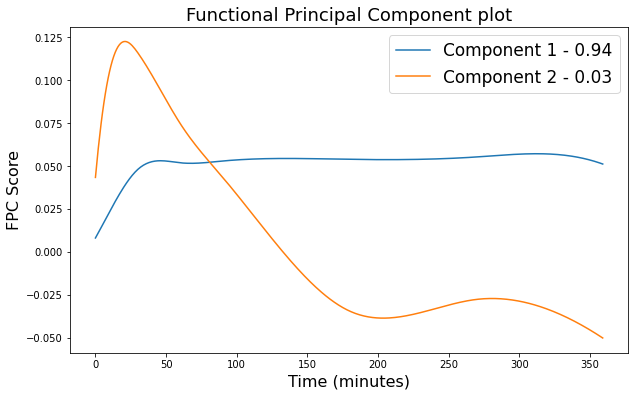

In [166]:
#Convert fpc1 and fpc2 to np.arrays
grid_points,data_points,variances = get_fp_data(fpcas['G'],gridpoints = np.arange(n_rows))

#plot each component
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(grid_points,data_points[0],color = fpc_colors[0])
ax.plot(grid_points,data_points[1],color = fpc_colors[1])
ax.legend(labels=['Component 1 - {:.2f}'.format(variances[0]),
                  'Component 2 - {:.2f}'.format(variances[1])],
         fontsize = 17)
ax.set_xlabel('Time (minutes)',fontsize = 16)
ax.set_ylabel('FPC Score',fontsize = 16)
ax.set_title('Functional Principal Component plot',fontsize = 18)

Text(0.5, 1.0, 'Functional Principal Component plot')

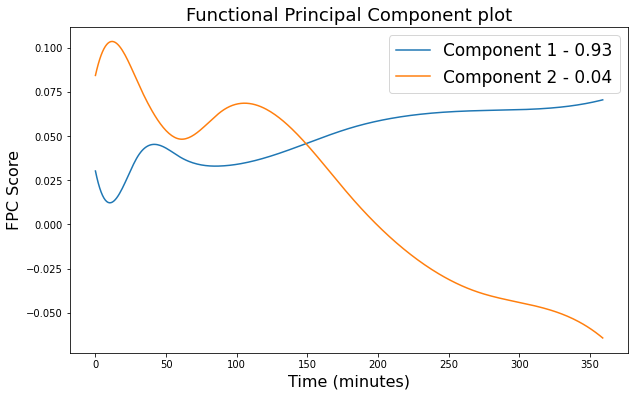

In [167]:
#Convert fpc1 and fpc2 to np.arrays
grid_points,data_points,variances = get_fp_data(fpcas['R'],gridpoints = np.arange(n_rows))

#plot each component
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(grid_points,data_points[0],color = fpc_colors[0])
ax.plot(grid_points,data_points[1],color = fpc_colors[1])
ax.legend(labels=['Component 1 - {:.2f}'.format(variances[0]),
                  'Component 2 - {:.2f}'.format(variances[1])],
         fontsize = 17)
ax.set_xlabel('Time (minutes)',fontsize = 16)
ax.set_ylabel('FPC Score',fontsize = 16)
ax.set_title('Functional Principal Component plot',fontsize = 18)

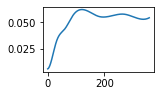

In [91]:
#plot each seperately with no legend
fig,ax = plt.subplots(figsize = (2,1.2))
ax.plot(grid_points,data_points[0],color = fpc_colors[0])

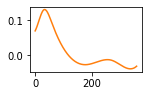

In [93]:
#plot each seperately with no legend
fig,ax = plt.subplots(figsize = (2,1.2))
ax.plot(grid_points,data_points[1],color = fpc_colors[1])

**Grouped fPCA scoreplot without annotation**

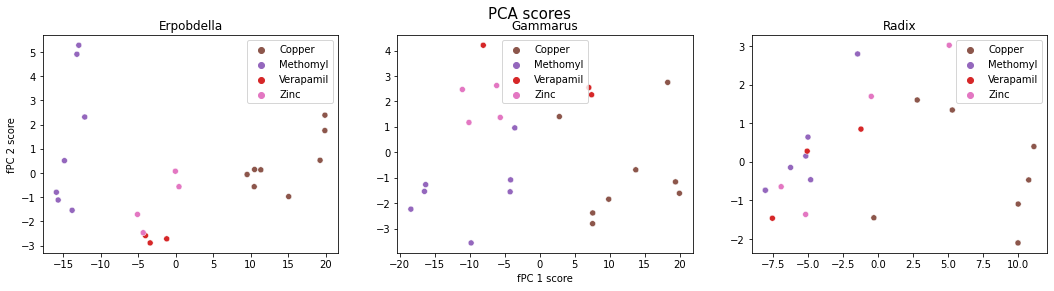

In [94]:
#Show all PCAs as FPCA scores plot
scores = {s:fpcas[s].fit_transform(X_bss[s]) for s in specie}

fig_FPCA,ax_FPCA = plt.subplots(1,3,figsize=(18,4))
fig_FPCA.suptitle('PCA scores',fontsize = 15)

ax_FPCA[1].set_xlabel("fPC 1 score")
ax_FPCA[0].set_ylabel("fPC 2 score")

for i,s in enumerate(specie):
    sns.scatterplot(x=scores[s][:, 0], y=scores[s][:, 1],hue = y,ax = ax_FPCA[i])
    ax_FPCA[i].set_title(specie[s])  

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

*Single fPCA plot*

In [122]:
temp = scores['E']
vals = [i for i in range(len(y)) if y[i] == 'Copper']
np.mean(temp[vals],axis = 0)

array([14.50984093,  0.41609494])

['Copper', 'Methomyl', 'Verapamil', 'Zinc']

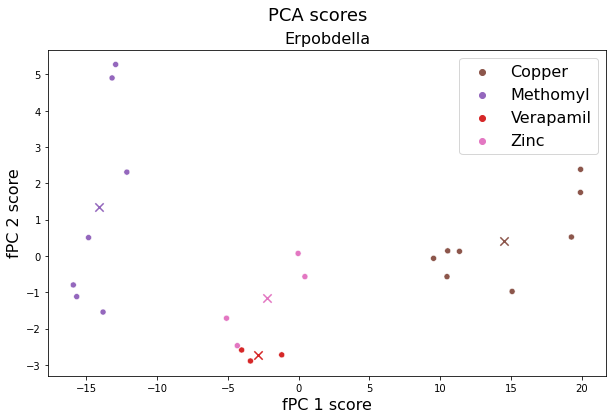

In [174]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 18)

ax_FPCA.set_xlabel("fPC 1 score",fontsize = 16)
ax_FPCA.set_ylabel("fPC 2 score",fontsize = 16)

sp = 'E'
sns.scatterplot(x=scores[sp][:, 0], y=scores[sp][:, 1],hue = y,ax = ax_FPCA)
ax_FPCA.set_title(specie[sp],fontsize = 16)
ax_FPCA.legend(fontsize=16)

#calculate cluster centre means
cluster_centres = np.zeros((len(substances),2))
for i,substance in enumerate(substances):
    vals = [i for i in range(len(y)) if y[i] == substance]
    cluster_centre = np.mean(scores[sp][vals],axis = 0)
    cluster_centres[i] = cluster_centre
    plt.scatter(cluster_centre[0], cluster_centre[1], marker='x', color=plot_colors[substance], s=70)

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

Gammarus fPCA

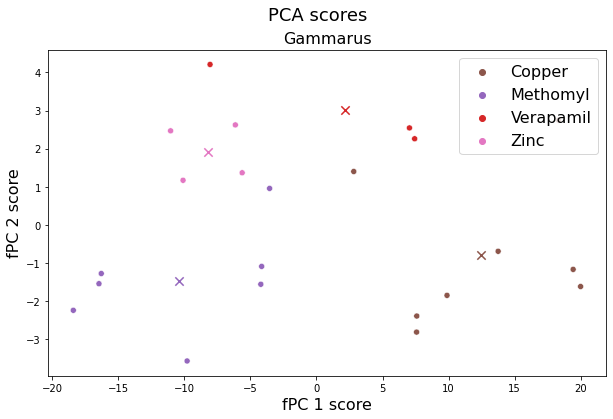

In [173]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 18)

ax_FPCA.set_xlabel("fPC 1 score",fontsize = 16)
ax_FPCA.set_ylabel("fPC 2 score",fontsize = 16)

sp = 'G'
sns.scatterplot(x=scores[sp][:, 0], y=scores[sp][:, 1],hue = y,ax = ax_FPCA)
ax_FPCA.set_title(specie[sp],fontsize = 16)
ax_FPCA.legend(fontsize=16)

#calculate cluster centre means
cluster_centres = np.zeros((len(substances),2))
for i,substance in enumerate(substances):
    vals = [i for i in range(len(y)) if y[i] == substance]
    cluster_centre = np.mean(scores[sp][vals],axis = 0)
    cluster_centres[i] = cluster_centre
    plt.scatter(cluster_centre[0], cluster_centre[1], marker='x', color=plot_colors[substance], s=70)

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

Radix fPCA

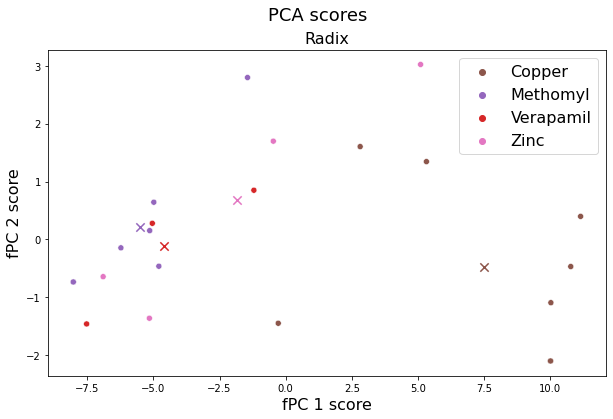

In [172]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 18)

ax_FPCA.set_xlabel("fPC 1 score",fontsize = 16)
ax_FPCA.set_ylabel("fPC 2 score",fontsize = 16)

sp = 'R'
sns.scatterplot(x=scores[sp][:, 0], y=scores[sp][:, 1],hue = y,ax = ax_FPCA)
ax_FPCA.set_title(specie[sp],fontsize = 16)
ax_FPCA.legend(fontsize=16)

#calculate cluster centre means
cluster_centres = np.zeros((len(substances),2))
for i,substance in enumerate(substances):
    vals = [i for i in range(len(y)) if y[i] == substance]
    cluster_centre = np.mean(scores[sp][vals],axis = 0)
    cluster_centres[i] = cluster_centre
    plt.scatter(cluster_centre[0], cluster_centre[1], marker='x', color=plot_colors[substance], s=70)

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

### Projections

In [149]:
def get_fingerprint(x,cluster_centres,X_mean,data_points):
    """ 
    Get the xth fingerprint 
    Cluster fPCA centre xth entry in cluster_centres
    X_mean offsets points
    datapoints[0] is fPC1
    datapoints[1] is fPC2
    """
    centre = cluster_centres[x]
    cluster_centre = data_points[0]*centre[0] + data_points[1]*centre[1]
    return cluster_centre + X_mean

Text(0, 0.5, 'Normalised mean response')

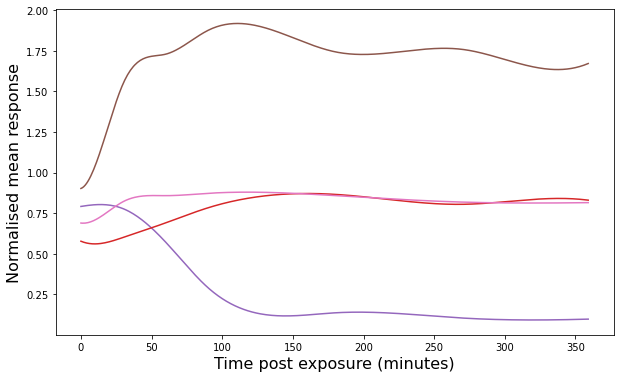

In [163]:
fingerprints = {sub:np.zeros((n_rows,)) for sub in substances}
X_mean = np.mean(X_grid[sp].data_matrix,axis = 0).flatten()
#Convert fpc1 and fpc2 to np.arrays
grid_points,data_points,variances = get_fp_data(fpcas['E'],gridpoints = np.arange(n_rows))
#fPC_cluster_centre = data_points[0]*cluster_centres[0,0] + data_points[1]*cluster_centres[0,1]
#fPC_cluster_centre = fPC_cluster_centre + np.mean(X_grid[sp].data_matrix,axis = 0).flatten()

#plot each component
fig,ax = plt.subplots(figsize = (10,6))
for i,substance in enumerate(substances):
    fPC_cluster_centre = get_fingerprint(i,cluster_centres,X_mean,data_points)
    fingerprints[substance] = fPC_cluster_centre
    ax.plot(grid_points,fPC_cluster_centre,color = plot_colors[substance])
#ax.plot(grid_points,X_mean,color = 'black', linestyle = '--')
    
ax.set_xlabel('Time post exposure (minutes)',fontsize = 16)
ax.set_ylabel('Normalised mean response',fontsize = 16)

### Fingerprints Bold

Text(0, 0.5, 'Normalised mean response')

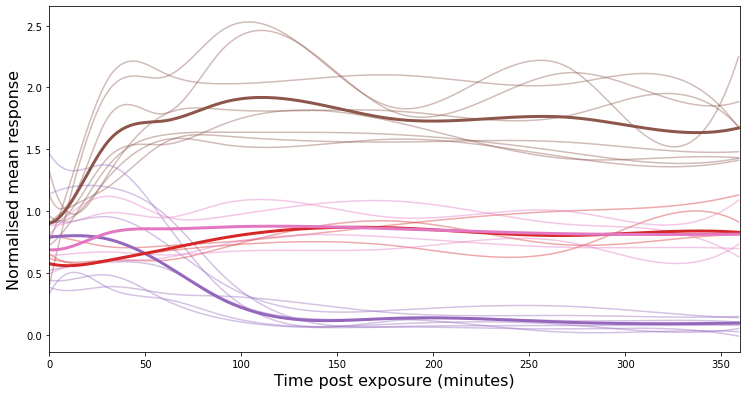

In [165]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'E'
for x,col in enumerate(data[sp].columns):
    axe.plot(X_grid[sp].grid_points[0],X_grid[sp].data_matrix[x].flatten(),color = plot_colors[y[x]],alpha = 0.4)
for sub in substances:
    axe.plot(X_grid[sp].grid_points[0],fingerprints[sub],color = plot_colors[sub],linewidth=3)
axe.set_xlim([0,360])

axe.set_xlabel('Time post exposure (minutes)',fontsize = 16)
axe.set_ylabel('Normalised mean response',fontsize = 16)

In [ ]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'E'
for x,col in enumerate(data[sp].columns):
    axe.plot(X_grid[sp].grid_points[0],X_grid[sp].data_matrix[x].flatten(),color = plot_colors[y[x]])
axe.set_xlim([0,360])

*Single fPCA plot with annotations*

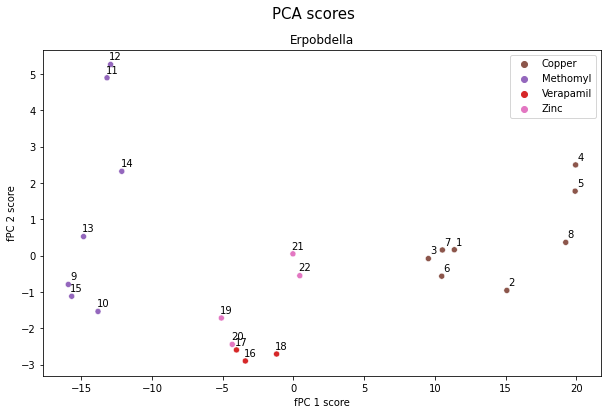

In [29]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 15)

ax_FPCA.set_xlabel("fPC 1 score")
ax_FPCA.set_ylabel("fPC 2 score")

sp = 'E'
sns.scatterplot(x=scores[sp][:, 0], y=scores[sp][:, 1],hue = y,ax = ax_FPCA)
annotate_scatter_points(scores[sp],fig_FPCA,ax_FPCA)
ax_FPCA.set_title(specie[sp])

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

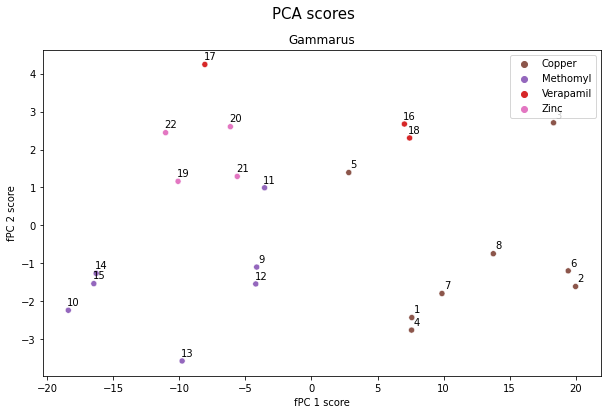

In [30]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 15)

ax_FPCA.set_xlabel("fPC 1 score")
ax_FPCA.set_ylabel("fPC 2 score")

sp = 'G'
sns.scatterplot(x=scores[sp][:, 0], y=scores[sp][:, 1],hue = y,ax = ax_FPCA)
annotate_scatter_points(scores[sp],fig_FPCA,ax_FPCA)
ax_FPCA.set_title(specie[sp])

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

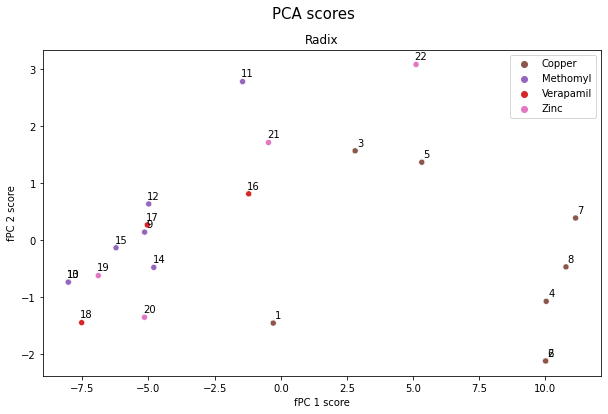

In [31]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 15)

ax_FPCA.set_xlabel("fPC 1 score")
ax_FPCA.set_ylabel("fPC 2 score")

sp = 'R'
sns.scatterplot(x=scores[sp][:, 0], y=scores[sp][:, 1],hue = y,ax = ax_FPCA)
annotate_scatter_points(scores[sp],fig_FPCA,ax_FPCA)
ax_FPCA.set_title(specie[sp])

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

Substance plot for individual repetitions

In [32]:
subcounts = dict(zip(substances,counts))
subcounts

{'Copper': 8, 'Methomyl': 7, 'Verapamil': 3, 'Zinc': 4}

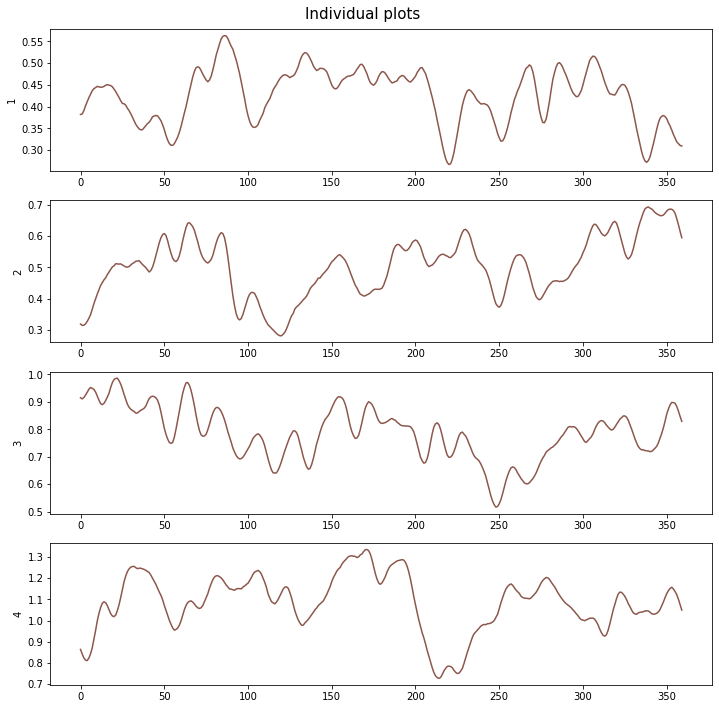

In [41]:
sub = 'Zinc'
sp = 'R'
n = subcounts[sub]
fig_FPCA,ax_FPCA = plt.subplots(n,1,figsize=(10,10))
fig_FPCA.suptitle('Individual plots',fontsize = 15)
for i,ax in enumerate(ax_FPCA):
    ax.plot(data[sp].index,data[sp]['{}{}'.format(sub,i)].values)
    ax.set_ylabel(i+1)
plt.tight_layout()